In [77]:
## https://linkinghub.elsevier.com/retrieve/pii/S235234091831504X- Actual Data Link

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('db_HEAs.csv')

In [4]:
df

,Unnamed: 0,alloy_name,phases,VHN,R_delta,S_config,VEC,R_cov_delta,density_avg,Tm_avg,...,Compress_avg,Compress_delta,EN_Allen_avg,H_avg,Vm_delta,E_coh_avg,E_coh_delta,Senkov_param,H_chem,H_el
0,0,Al1.8CoCrCuFe,FCC + BCC,557.0,0.429641,0.486149,0.554598,0.065928,0.343798,0.109389,...,0.153912,0.438852,0.780542,0.245616,0.448845,0.167904,0.260147,0.004124,0.627285,0.279585
1,1,AlCoCrCuFeNi,FCC + BCC,439.0,0.352937,0.706695,0.699074,0.123787,0.427388,0.170799,...,0.106397,0.422213,0.852306,0.297875,0.392831,0.201146,0.245394,0.007434,0.673670,0.205536
2,2,Al22.5Cu20Fe15Ni20Ti22.5,FCC,516.0,0.485714,0.510767,0.579861,0.632699,0.332250,0.119873,...,0.165314,0.345664,0.707093,0.540378,0.533287,0.215112,0.350374,0.000572,0.258663,0.479585
3,3,Co1.5CrFeNi1.5Ti,FCC + Im,654.0,0.422862,0.500000,0.687500,0.621023,0.453971,0.297606,...,0.065564,0.224068,0.788091,0.707487,0.494275,0.284002,0.098818,0.001842,0.408731,0.384775
4,4,NbTaTiVW,BCC+HCP,447.0,0.235923,0.520810,0.305556,0.113213,0.754621,0.790831,...,0.058930,0.335243,0.246935,0.454052,0.205361,0.812090,0.584017,0.019282,0.726057,0.155017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,AlCrFeNiMo0.5Ti0.25,BCC + Im,712.0,0.440477,0.617292,0.517544,0.490870,0.382083,0.267439,...,0.111566,0.488715,0.706517,0.336025,0.468974,0.278434,0.538339,0.002095,0.423192,0.429066
214,214,Al0.68CoCrFeMnNi,FCC + BCC,486.0,0.343322,0.697889,0.639085,0.178431,0.424891,0.207558,...,0.156460,0.564547,0.837424,0.268799,0.338248,0.187568,0.352535,0.003588,0.547885,0.165398
215,215,Al0.3NbTaTi1.4Zr1.3,BCC,490.0,0.321506,0.428859,0.213889,0.388024,0.492601,0.568271,...,0.169364,0.321788,0.159720,0.649346,0.308853,0.681688,0.580954,0.012467,0.706412,0.170242
216,216,Al0.5CoCrCuFeNiV0.2,FCC,204.0,0.272724,0.773965,0.744152,0.248059,0.460902,0.214544,...,0.082387,0.349292,0.862291,0.331298,0.302153,0.222045,0.256644,0.017134,0.746248,0.131488


In [5]:
df.isnull()

,Unnamed: 0,alloy_name,phases,VHN,R_delta,S_config,VEC,R_cov_delta,density_avg,Tm_avg,...,Compress_avg,Compress_delta,EN_Allen_avg,H_avg,Vm_delta,E_coh_avg,E_coh_delta,Senkov_param,H_chem,H_el
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Unnamed: 0        0
alloy_name        0
phases            9
VHN               0
R_delta           0
S_config          0
VEC               0
R_cov_delta       0
density_avg       0
Tm_avg            0
E_avg             0
E_delta           0
G_avg             0
G_delta           0
K_avg             0
K_delta           0
Compress_avg      0
Compress_delta    0
EN_Allen_avg      0
H_avg             0
Vm_delta          0
E_coh_avg         0
E_coh_delta       0
Senkov_param      0
H_chem            0
H_el              0
dtype: int64

## Indepenent and Dependent Features

In [9]:
y=df['VHN']

In [10]:

X=df[['alloy_name','phases','R_cov_delta','G_delta','VEC','E_delta','H_chem','H_el']]

In [11]:
X

,alloy_name,phases,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el
0,Al1.8CoCrCuFe,FCC + BCC,0.065928,0.651824,0.554598,0.599158,0.627285,0.279585
1,AlCoCrCuFeNi,FCC + BCC,0.123787,0.507946,0.699074,0.489137,0.673670,0.205536
2,Al22.5Cu20Fe15Ni20Ti22.5,FCC,0.632699,0.681679,0.579861,0.638642,0.258663,0.479585
3,Co1.5CrFeNi1.5Ti,FCC + Im,0.621023,0.343857,0.687500,0.341835,0.408731,0.384775
4,NbTaTiVW,BCC+HCP,0.113213,0.964258,0.305556,0.965055,0.726057,0.155017
...,...,...,...,...,...,...,...,...
213,AlCrFeNiMo0.5Ti0.25,BCC + Im,0.490870,0.665441,0.517544,0.668583,0.423192,0.429066
214,Al0.68CoCrFeMnNi,FCC + BCC,0.178431,0.369800,0.639085,0.380116,0.547885,0.165398
215,Al0.3NbTaTi1.4Zr1.3,BCC,0.388024,0.614406,0.213889,0.571992,0.706412,0.170242
216,Al0.5CoCrCuFeNiV0.2,FCC,0.248059,0.424013,0.744152,0.410081,0.746248,0.131488


In [12]:
X['phases'].unique()


array(['FCC + BCC', 'FCC', 'FCC + Im', 'BCC+HCP', 'BCC + Im', 'BCC',
       'FCC + BCC + Im', nan, 'BCC + lm', 'FCC + HCP', 'FCC + BCC + B2',
       'Im'], dtype=object)

## Handling Missing Values


In [13]:
X['phases'].mode()

0    BCC
Name: phases, dtype: object

In [14]:
X.loc[:, 'phases'] = X['phases'].fillna('BCC')


In [15]:
X['phases'].isnull().sum()

0

In [16]:
y

0      557.0
1      439.0
2      516.0
3      654.0
4      447.0
       ...  
213    712.0
214    486.0
215    490.0
216    204.0
217    857.0
Name: VHN, Length: 218, dtype: float64

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
type(y)

pandas.core.series.Series

In [19]:
y = y.to_frame()


In [21]:
y.shape

(218, 1)

In [22]:
X

,alloy_name,phases,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el
0,Al1.8CoCrCuFe,FCC + BCC,0.065928,0.651824,0.554598,0.599158,0.627285,0.279585
1,AlCoCrCuFeNi,FCC + BCC,0.123787,0.507946,0.699074,0.489137,0.673670,0.205536
2,Al22.5Cu20Fe15Ni20Ti22.5,FCC,0.632699,0.681679,0.579861,0.638642,0.258663,0.479585
3,Co1.5CrFeNi1.5Ti,FCC + Im,0.621023,0.343857,0.687500,0.341835,0.408731,0.384775
4,NbTaTiVW,BCC+HCP,0.113213,0.964258,0.305556,0.965055,0.726057,0.155017
...,...,...,...,...,...,...,...,...
213,AlCrFeNiMo0.5Ti0.25,BCC + Im,0.490870,0.665441,0.517544,0.668583,0.423192,0.429066
214,Al0.68CoCrFeMnNi,FCC + BCC,0.178431,0.369800,0.639085,0.380116,0.547885,0.165398
215,Al0.3NbTaTi1.4Zr1.3,BCC,0.388024,0.614406,0.213889,0.571992,0.706412,0.170242
216,Al0.5CoCrCuFeNiV0.2,FCC,0.248059,0.424013,0.744152,0.410081,0.746248,0.131488


In [23]:
X.shape

(218, 8)

## Phase Mapping with their codes

In [25]:
X['phases'].unique()

array(['FCC + BCC', 'FCC', 'FCC + Im', 'BCC+HCP', 'BCC + Im', 'BCC',
       'FCC + BCC + Im', 'BCC + lm', 'FCC + HCP', 'FCC + BCC + B2', 'Im'],
      dtype=object)

In [26]:


# Now apply the phase mapping again

phase_mapping ={'FCC + BCC':3
                , 'FCC':1
                , 'FCC + Im':4
                , 'BCC+HCP':8
                , 'BCC + Im':5
                , 'BCC':2
                , 'FCC + BCC + Im':6
                , 'BCC + Im':5
                , 'FCC + HCP':9
                , 'FCC + BCC + B2':10
                , 'Im':7
    
}


In [27]:
X

,alloy_name,phases,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el
0,Al1.8CoCrCuFe,FCC + BCC,0.065928,0.651824,0.554598,0.599158,0.627285,0.279585
1,AlCoCrCuFeNi,FCC + BCC,0.123787,0.507946,0.699074,0.489137,0.673670,0.205536
2,Al22.5Cu20Fe15Ni20Ti22.5,FCC,0.632699,0.681679,0.579861,0.638642,0.258663,0.479585
3,Co1.5CrFeNi1.5Ti,FCC + Im,0.621023,0.343857,0.687500,0.341835,0.408731,0.384775
4,NbTaTiVW,BCC+HCP,0.113213,0.964258,0.305556,0.965055,0.726057,0.155017
...,...,...,...,...,...,...,...,...
213,AlCrFeNiMo0.5Ti0.25,BCC + Im,0.490870,0.665441,0.517544,0.668583,0.423192,0.429066
214,Al0.68CoCrFeMnNi,FCC + BCC,0.178431,0.369800,0.639085,0.380116,0.547885,0.165398
215,Al0.3NbTaTi1.4Zr1.3,BCC,0.388024,0.614406,0.213889,0.571992,0.706412,0.170242
216,Al0.5CoCrCuFeNiV0.2,FCC,0.248059,0.424013,0.744152,0.410081,0.746248,0.131488


In [28]:
# Check unique values to understand the issue
unique_phases = X['phases'].unique()
print(unique_phases)


['FCC + BCC' 'FCC' 'FCC + Im' 'BCC+HCP' 'BCC + Im' 'BCC' 'FCC + BCC + Im'
 'BCC + lm' 'FCC + HCP' 'FCC + BCC + B2' 'Im']


In [29]:
X.loc[:,'phase_code'] = X['phases'].map(phase_mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_8440\2099839733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'phase_code'] = X['phases'].map(phase_mapping)


In [30]:
X[X['phase_code'].isnull()]

,alloy_name,phases,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el,phase_code
59,HfNbSi0.5TiV,BCC + lm,0.703059,0.386033,0.228395,0.151911,0.359618,0.490657,NaN
74,HfNbTiVZr,BCC + lm,0.289978,0.450093,0.222222,0.315324,0.830014,0.482353,NaN
76,HfNbSi0.5TiVZr,BCC + lm,0.682037,0.542188,0.217172,0.297543,0.398909,0.534256,NaN
129,CrHfNbTiZr,BCC + lm,0.582617,0.553706,0.250000,0.357191,0.717326,0.838754,NaN


In [31]:
X = X.fillna(5)

In [32]:
X[X['phase_code'].isnull()]

,alloy_name,phases,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el,phase_code


In [33]:
X = X.drop(['alloy_name', 'phases'], axis=1)


In [34]:
X

,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el,phase_code
0,0.065928,0.651824,0.554598,0.599158,0.627285,0.279585,3.0
1,0.123787,0.507946,0.699074,0.489137,0.673670,0.205536,3.0
2,0.632699,0.681679,0.579861,0.638642,0.258663,0.479585,1.0
3,0.621023,0.343857,0.687500,0.341835,0.408731,0.384775,4.0
4,0.113213,0.964258,0.305556,0.965055,0.726057,0.155017,8.0
...,...,...,...,...,...,...,...
213,0.490870,0.665441,0.517544,0.668583,0.423192,0.429066,5.0
214,0.178431,0.369800,0.639085,0.380116,0.547885,0.165398,3.0
215,0.388024,0.614406,0.213889,0.571992,0.706412,0.170242,2.0
216,0.248059,0.424013,0.744152,0.410081,0.746248,0.131488,1.0


In [35]:
df1= pd.concat([X, y], axis=1)


In [38]:
df1

,R_cov_delta,G_delta,VEC,E_delta,H_chem,H_el,phase_code,VHN
0,0.065928,0.651824,0.554598,0.599158,0.627285,0.279585,3.0,557.0
1,0.123787,0.507946,0.699074,0.489137,0.673670,0.205536,3.0,439.0
2,0.632699,0.681679,0.579861,0.638642,0.258663,0.479585,1.0,516.0
3,0.621023,0.343857,0.687500,0.341835,0.408731,0.384775,4.0,654.0
4,0.113213,0.964258,0.305556,0.965055,0.726057,0.155017,8.0,447.0
...,...,...,...,...,...,...,...,...
213,0.490870,0.665441,0.517544,0.668583,0.423192,0.429066,5.0,712.0
214,0.178431,0.369800,0.639085,0.380116,0.547885,0.165398,3.0,486.0
215,0.388024,0.614406,0.213889,0.571992,0.706412,0.170242,2.0,490.0
216,0.248059,0.424013,0.744152,0.410081,0.746248,0.131488,1.0,204.0


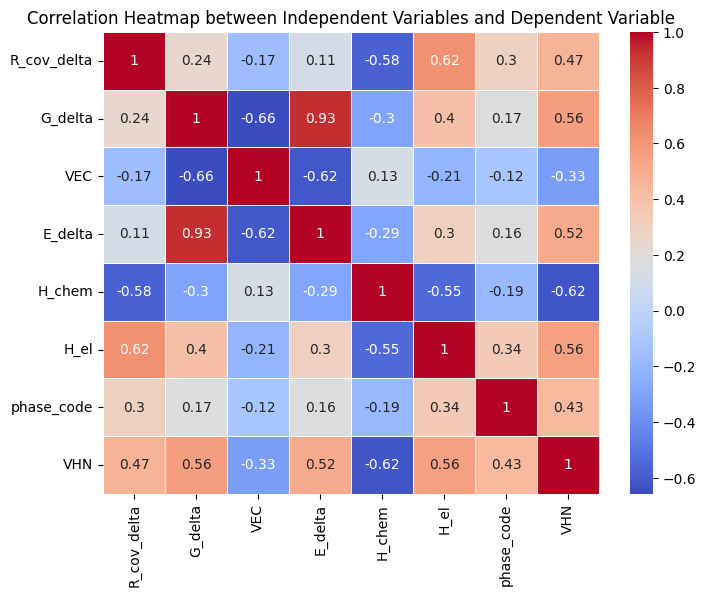

In [39]:
# Step 3: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap between Independent Variables and Dependent Variable')
plt.show()

## Train-Test Spilit

In [63]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

## Defining the ANN Model

In [41]:
import os
import tensorflow as tf
import time
import keras
from keras.layers import Dense,Input
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization

In [42]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(20,activation='sigmoid',kernel_initializer='he_normal'))
model.add(Dense(15,activation='sigmoid',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='relu'))

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
##  ANN Model Defining

random.seed(42)


np.random.seed(42)


tf.random.set_seed(42)


model = Sequential()

## Input Layer
model.add(Input(shape=X_train.shape[1:]))

# First dense layer with batch normalization and dropout
model.add(Dense(20, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(20, activation='sigmoid'))
model.add(Dropout(rate=0.2))

# Second dense layer with batch normalization and dropout
model.add(Dense(15, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(15, activation='sigmoid'))
model.add(Dropout(rate=0.2))

# Third dense layer with batch normalization and dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dropout(rate=0.2))


## Output Layer
model.add(Dense(1,activation='relu'))



LOSS_FUNCTION = "mae" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = Adam(learning_rate=0.002) # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["mae"]

model.compile(loss=LOSS_FUNCTION,
                      optimizer=OPTIMIZER,
                      metrics=METRICS)


history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
model.evaluate(X_test,y_test)

# Predict probabilities
# y_pred = model.predict(X_test)

# # Convert probabilities to binary output
# y_pred_binary = (y_pred > 0.5).astype(int)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 473.0302 - mae: 473.0302 - val_loss: 439.6198 - val_mae: 439.6198
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 472.9720 - mae: 472.9720 - val_loss: 439.4798 - val_mae: 439.4798
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 472.9560 - mae: 472.9560 - val_loss: 439.3206 - val_mae: 439.3206
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 472.9374 - mae: 472.9374 - val_loss: 439.1959 - val_mae: 439.1959
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 472.7255 - mae: 472.7255 - val_loss: 439.1275 - val_mae: 439.1275
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 472.6274 - mae: 472.6274 - val_loss: 439.1132 - val_mae: 439.1132
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 472.5921 - mae: 472.5921 - val_loss: 439.1006 - val_mae: 439.1006
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 472.3338 - mae: 472.3338 - val_loss: 439.0975 - val_mae: 439.0975
Epoch 9/20
5/5 ━

[488.9539794921875, 488.9539794921875]

In [62]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [64]:
score=r2_score(y_pred,y_test)

# XGBoost Model

In [1]:
import xgboost as xgb

## Train-Test Spilit

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Creation

In [49]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

In [50]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
y_pred = model_xgb.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" % (rmse))

In [59]:
from sklearn.metrics import r2_score

score1=r2_score(y_pred,y_test)

In [60]:
score1

0.7865708470344543

# KNN 

In [66]:
## importing the model

from sklearn.neighbors import KNeighborsRegressor


In [67]:
## Model Defination and Traning

regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [68]:
y_pred2=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2))

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression()

In [73]:
regression.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred3 = regression.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred3)
print(score)

0.6331521410122511


In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,y_pred3))
print(mean_absolute_error(y_test,y_pred3))
